In [1]:
## Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

## File to Load
mouse_drug_data = "data/mouse_drug_data.csv"
clinical_trial_data = "data/clinicaltrial_data.csv"

In [2]:
## Read the Mouse and Drug Data
drug_data = pd.read_csv(mouse_drug_data)
drug_data.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [3]:
## Read the Clinical Trial Data
trial_data = pd.read_csv(clinical_trial_data)
trial_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
## Combine the data into a single dataset
trial_drug_merge_df = pd.merge(trial_data, drug_data, on = "Mouse ID")
trial_drug_merge_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [5]:
## Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_vol_mean = (trial_drug_merge_df.groupby(["Drug", "Timepoint"]).mean()["Tumor Volume (mm3)"])
tumor_vol_mean.head()

Drug       Timepoint
Capomulin  0            45.000000
           5            44.266086
           10           43.084291
           15           42.064317
           20           40.716325
Name: Tumor Volume (mm3), dtype: float64

In [20]:
## Convert, data munging to reformat and preview to DataFrame
tumor_vol_mean_df = pd.DataFrame(tumor_vol_mean)
tumor_vol_mean_df = tumor_vol_mean_df.unstack(level = 0)
tumor_vol_mean_df.columns = tumor_vol_mean_df.columns.get_level_values(1)
tumor_vol_mean_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [7]:
## Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
strd_error = (trial_drug_merge_df.groupby(["Drug", "Timepoint"]).sem()["Tumor Volume (mm3)"])
strd_error.head()

Drug       Timepoint
Capomulin  0            0.000000
           5            0.448593
           10           0.702684
           15           0.838617
           20           0.909731
Name: Tumor Volume (mm3), dtype: float64

In [8]:
## Convert, data munging to reformat and preview to DataFrame
strd_error_df = pd.DataFrame(strd_error)
strd_error_df = strd_error_df.unstack(level = 0)
strd_error_df.columns = strd_error_df.columns.get_level_values(1)
strd_error_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


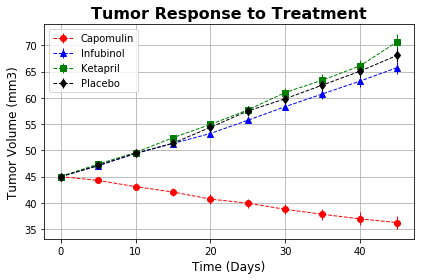

In [9]:
## Generate the Plot (with Error Bars)
drug_format_list = [("Capomulin","o","red"),("Infubinol","^","blue"),("Ketapril","s","green"),("Placebo","d","black")]
for drug,marker,colors in drug_format_list:
    error = strd_error_df[drug]
    plt.errorbar(tumor_vol_mean_df.index,tumor_vol_mean_df[drug],error,
                                       fmt = marker, ls = '--', color = colors, linewidth = 1)

## Plot options
plt.legend(loc = "best")
plt.title("Tumor Response to Treatment", fontdict = {"fontsize": 16, "fontweight": "bold"})
plt.xlabel("Time (Days)", fontdict = {"fontsize": 12})
plt.ylabel("Tumor Volume (mm3)", fontdict = {"fontsize": 12})
plt.grid()


## Save the Figure
plt.tight_layout()
plt.savefig("../tumor_response_to_treatment.png")


## Show the Figure
plt.show()

## Metastatic Response to Treatment

In [10]:
## Store the Mean Metastatic Sites Data Grouped by Drug and Timepoint 
met_sites_mean = (trial_drug_merge_df.groupby(["Drug", "Timepoint"]).mean()["Metastatic Sites"])
met_sites_mean.head()

Drug       Timepoint
Capomulin  0            0.000000
           5            0.160000
           10           0.320000
           15           0.375000
           20           0.652174
Name: Metastatic Sites, dtype: float64

In [11]:
## Convert, data munging to reformat and preview to DataFrame
met_sites_mean_df = pd.DataFrame(met_sites_mean)
met_sites_mean_df = met_sites_mean_df.unstack(level = 0)
met_sites_mean_df.columns = met_sites_mean_df.columns.get_level_values(1)
met_sites_mean_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [12]:
## Store the Standard Error of Metastatic Sites Data Grouped by Drug and Timepoint
se = (trial_drug_merge_df.groupby(["Drug", "Timepoint"]).sem()["Metastatic Sites"])
se.head()

Drug       Timepoint
Capomulin  0            0.000000
           5            0.074833
           10           0.125433
           15           0.132048
           20           0.161621
Name: Metastatic Sites, dtype: float64

In [13]:
## Convert, data munging to reformat and preview to DataFrame
met_sites_se_df = pd.DataFrame(se)
met_sites_se_df = met_sites_se_df.unstack(level = 0)
met_sites_se_df.columns = met_sites_se_df.columns.get_level_values(1)
met_sites_se_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


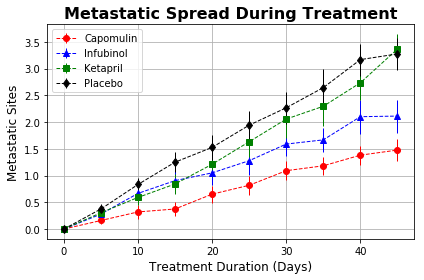

In [14]:
## Generate the Plot (with Error Bars)
drug_format_list = [("Capomulin","o","red"),("Infubinol","^","blue"),("Ketapril","s","green"),("Placebo","d","black")]
for drug,marker,colors in drug_format_list:
    error = met_sites_se_df[drug]
    plt.errorbar(met_sites_mean_df.index,met_sites_mean_df[drug],error,
                                       fmt = marker, ls = "--", color = colors, linewidth = 1)

## Plot options
plt.legend(loc = "best")
plt.title("Metastatic Spread During Treatment", fontdict = {"fontsize": 16, "fontweight": "bold"})
plt.xlabel("Treatment Duration (Days)", fontdict = {"fontsize": 12})
plt.ylabel("Metastatic Sites", fontdict = {"fontsize": 12})
plt.grid()


## Save the Figure
plt.tight_layout()
plt.savefig("../metastatic_spread_during_treatment.png")


## Show the Figure
plt.show()

## Survival Rates

In [15]:
## Store Count of Mice Grouped by Drug and Timepoint 
mice_count = (trial_drug_merge_df.groupby(["Drug", "Timepoint"]).count()["Mouse ID"])
mice_count.head()

Drug       Timepoint
Capomulin  0            25
           5            25
           10           25
           15           24
           20           23
Name: Mouse ID, dtype: int64

In [16]:
## Convert, data munging to reformat and preview to DataFrame
mice_count_df = pd.DataFrame(mice_count)
mice_count_df = mice_count_df.unstack(level = 0)
mice_count_df.columns = mice_count_df.columns.get_level_values(1)
mice_count_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


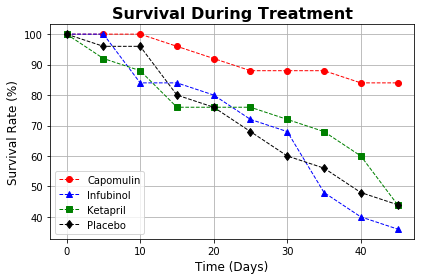

In [17]:
## Generate the Plot (with Error Bars)
drug_format_list = [("Capomulin","o","red"),("Infubinol","^","blue"),("Ketapril","s","green"),("Placebo","d","black")]
for drug,marker,colors in drug_format_list:
    total_count = mice_count_df[drug][0]
    survival_rate = (mice_count_df[drug] / total_count) * 100
    plt.plot(mice_count_df.index,survival_rate,
                                       marker = marker, ls = "--", color = colors, linewidth = 1)

## Plot options
plt.legend(loc = "best")
plt.title("Survival During Treatment", fontdict = {"fontsize": 16, "fontweight": "bold"})
plt.xlabel("Time (Days)", fontdict = {"fontsize": 12})
plt.ylabel("Survival Rate (%)", fontdict = {"fontsize": 12})
plt.grid()


## Save the Figure
plt.tight_layout()
plt.savefig("../survival_rates.png")


## Show the Figure
plt.show()

## Summary Bar Graph

In [18]:
## Calculate the percent changes for each drug and store them into a tuple
drugs_list = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
tumor_size_start = tumor_vol_mean_df.iloc[0]
tumor_size_end = tumor_vol_mean_df.iloc[-1]
change = (tumor_size_end - tumor_size_start) / tumor_size_start *100
change = change[drugs_list]
change

Drug
Capomulin   -19.475303
Infubinol    46.123472
Ketapril     57.028795
Placebo      51.297960
dtype: float64

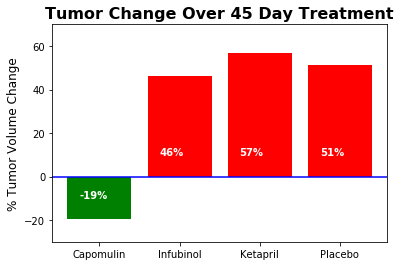

In [19]:
## Splice the data between passing and failing drugs
x_axis = np.arange(4)
x_labels = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
tick_locations = [value for value in x_axis]
plt.bar(x_axis, change, 
        color = ["green" if change[x] < 0 else "red" for x in x_axis])
        
## Orient widths. Add labels, tick marks, etc. 
plt.axhline(y = 0, color = "blue")
plt.title("Tumor Change Over 45 Day Treatment", fontdict = {"fontsize": 16, "fontweight": "bold"})
plt.ylabel("% Tumor Volume Change", fontdict = {"fontsize": 12})
plt.xticks(tick_locations, x_labels)
plt.ylim(-30, 70)

## Use functions to label the percentages of changes
def autolabel(values_list):
    for idx, value in enumerate(values_list):
        if value > 0:
            plt.text(idx-0.25, 10, f"{round(value)}%", color = "white", fontsize = 10, fontweight = "bold")
        else:
            plt.text(idx-0.25, -10, f"{round(value)}%", color = "white", fontsize = 10, fontweight = "bold")

## Call functions to implement the function calls
autolabel(change)

## Save the Figure
plt.savefig("../pct_change_by_treatment.png")

## Show the Figure
plt.show()

## Analysis

- __Tumor Response to Treatment Analysis__ shows that the drug Capomulin had a better result, the tumors volume for the mice taking Capomulin shrunk in course of trial while for the mice taking the other drugs, tumors volume grew almost with the same rate.
>
- __Metastatic Spread During Treatment Analysis__ shows that all tumors had metastatic spread regardless of the drug, although the mice taking Capomulin had slowest metastatic spread and Placebo had the fastest spread.
>
- __Survival During Treatment Analysis__ shows that over 80% of the mice taking Capomullin has survived during the course of trial. For the other drugs, survival rate dropped with almost same rate till day 30 and after that survival rate for Infubinol has significantly dropped.
>
_According to these trends and tumor volume change percentage which we can see in the last graph, we could suggest that Capomulin had the most favorable result between the compared drugs._